In [105]:
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas_datareader import data 
import tensorflow as tf 
#from tensorflow.contrib.rnn import LSTMCell tf.logging.set_verbosity(tf.logging.ERROR) 
from time import time 
from matplotlib.colors import hsv_to_rgb
from scipy.stats import ks_2samp

## Reading data

In [106]:
apple = data.DataReader('AFI.AX', 'yahoo', start='1/1/2010', end= '1/10/2015')
apple['Returns'] = apple['Adj Close'].pct_change()
mu = apple['Returns'].mean()
std = apple['Returns'].std()

In [107]:
mu, std

(0.0038995028124773315, 0.08867293733836576)

In [31]:
# mu = apple['Adj Close'].mean()
# std = apple['Adj Close'].std()

In [108]:
def sample_data(n_samples=50000, seq_length=10):

    vectors = []

    for i in range(n_samples):
        daily_returns=np.random.normal(mu, std, seq_length)
        vectors.append(daily_returns)
    
    return np.asarray(vectors)

In [109]:
apple.head()

,High,Low,Open,Close,Volume,Adj Close,Returns
Date,,,,,,,
2010-01-03,5.20,5.17,5.20,5.17,199286,5.17,NaN
2010-01-04,5.25,5.19,5.19,5.25,344769,5.25,0.015474
2010-01-05,5.30,5.24,5.25,5.25,173641,5.25,0.000000
2010-01-06,5.30,5.26,5.27,5.26,122333,5.26,0.001905
2010-01-07,5.35,5.27,5.27,5.34,151626,5.34,0.015209


In [110]:
def series_from_returns(start, returns):
    res = [start]
    for ret in returns:
        res.append(res[-1]*ret + res[-1])
    return res

In [112]:
samples = sample_data()

In [113]:
from gans.rgan import RGAN

In [114]:
gan = RGAN(num_epochs=5)

In [116]:
gen_samples = gan.train_loop(samples, reshape=True)

epoch: 0 	D_loss: 1.5964205 	G_loss: 0.32948187 	Total_loss: 1.9259024
epoch: 0 	D_loss: 1.2044616 	G_loss: 0.8850625 	Total_loss: 2.089524
epoch: 1 	D_loss: 1.4248195 	G_loss: 0.60396576 	Total_loss: 2.0287852
epoch: 1 	D_loss: 1.3497118 	G_loss: 0.70484513 	Total_loss: 2.0545568
epoch: 2 	D_loss: 1.3588649 	G_loss: 0.70379287 	Total_loss: 2.0626578
epoch: 2 	D_loss: 1.321104 	G_loss: 0.69430983 	Total_loss: 2.0154138
epoch: 3 	D_loss: 1.2546632 	G_loss: 0.7541201 	Total_loss: 2.0087833
epoch: 3 	D_loss: 1.3256931 	G_loss: 0.7321375 	Total_loss: 2.0578306
epoch: 4 	D_loss: 1.3928932 	G_loss: 0.68739176 	Total_loss: 2.080285
epoch: 4 	D_loss: 1.394804 	G_loss: 0.684095 	Total_loss: 2.078899


## Sequence of length 10

### Monte Carlo simulations:

Text(0, 0.5, 'loss')

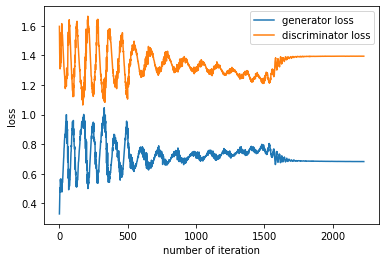

In [117]:
plt.plot(gan.g_loss[:4000])
plt.plot(gan.d_loss[:4000])
plt.legend(['generator loss', 'discriminator loss'])
plt.xlabel('number of iteration')
plt.ylabel('loss')

In [118]:
gen_samples.mean(), gen_samples.std()

(0.00036445216, 0.059607334)

In [21]:
start = apple['Adj Close'][0]

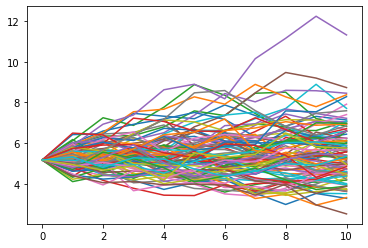

In [22]:
for sample in samples[:100]:
    plt.plot(series_from_returns(start, sample))

### RGAN results

In [102]:
start = apple['Adj Close'][0]

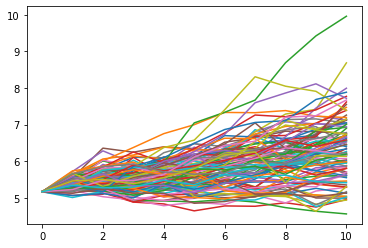

In [104]:
for sample in gen_samples.reshape(49980, 10)[:100]:
    plt.plot(series_from_returns(start, sample))

### mean and std 

In [27]:
#generated
gen_samples.mean(), gen_samples.std()

(-0.00019423602, 0.01660433)

In [29]:
#monte carlo simulations
samples.mean(), samples.std()

(0.003894149613425367, 0.08861241269813)

### p_value for normal test

In [119]:
from scipy import stats
all_gen_samples = gen_samples.reshape(-1, 50)
p_value = np.mean([stats.normaltest(all_gen_samples[i]).pvalue for i in range(1000)])
print("Mean p_value", p_value)

Mean p_value 0.3812653343129849


## Sequence of length 50

In [123]:
samples_50 = sample_data(seq_length=50)
gan50 = RGAN(num_epochs=5, seq_length=50)
gen_samples50 = gan50.train_loop(samples_50, reshape=True)

epoch: 0 	D_loss: 1.7438803 	G_loss: 0.28989384 	Total_loss: 2.0337741
epoch: 0 	D_loss: 1.3396988 	G_loss: 0.7106741 	Total_loss: 2.0503728
epoch: 1 	D_loss: 1.1942911 	G_loss: 0.8248992 	Total_loss: 2.0191903
epoch: 1 	D_loss: 0.9999722 	G_loss: 1.2488503 	Total_loss: 2.2488227
epoch: 2 	D_loss: 0.8973665 	G_loss: 1.3291205 	Total_loss: 2.2264872
epoch: 2 	D_loss: 1.0521737 	G_loss: 1.0185987 	Total_loss: 2.0707724
epoch: 3 	D_loss: 0.9997889 	G_loss: 1.2437123 	Total_loss: 2.2435012
epoch: 3 	D_loss: 1.1111994 	G_loss: 1.1579574 	Total_loss: 2.269157
epoch: 4 	D_loss: 1.2068124 	G_loss: 0.93358636 	Total_loss: 2.1403987
epoch: 4 	D_loss: 1.3194542 	G_loss: 0.72921395 	Total_loss: 2.0486681


### Learning curves:

Text(0, 0.5, 'loss')

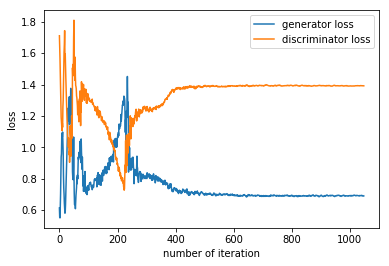

In [188]:
plt.plot(g_loss[:4000])
plt.plot(d_loss[:4000])
plt.legend(['generator loss', 'discriminator loss'])
plt.xlabel('number of iteration')
plt.ylabel('loss')

In [189]:
np.mean(g_loss[-200:]), np.mean(d_loss[-200:])

(0.6918385, 1.3918219)

### Generated data:

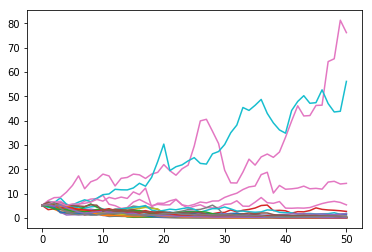

In [206]:
for sample in gen_samples_mb.reshape(28, 50):
    plt.plot(series_from_returns(start, sample.reshape(-1)))

### Testing if the generated data is normal distribution

In [208]:
from scipy import stats

In [219]:
all_gen_samples = gen_samples_mb.reshape(28, 50)
p_value = np.mean([stats.normaltest(all_gen_samples[i]).pvalue for i in range(batch_size)])
print("Mean p_value", p_value)

Mean p_value 0.4907392607556809


# Mean value and std of the original data

In [124]:
mu = apple['Adj Close'].mean()
std = apple['Adj Close'].std()
mu, std

(5.680612396854925, 0.7699040681456591)

In [125]:
samples10 = sample_data()

In [126]:
np.mean(samples10), np.std(samples10)

(5.679427327846139, 0.7712964148166935)

In [128]:
gan = RGAN(num_epochs=10)
gen_samples10 = gan.train_loop(samples10, reshape=True)

epoch: 0 	D_loss: 1.0652558 	G_loss: 0.628131 	Total_loss: 1.6933868
epoch: 0 	D_loss: 0.08341545 	G_loss: 3.5723028 	Total_loss: 3.6557183
epoch: 1 	D_loss: 0.05872181 	G_loss: 4.2968717 	Total_loss: 4.3555937
epoch: 1 	D_loss: 0.042597152 	G_loss: 4.9499555 	Total_loss: 4.9925528
epoch: 2 	D_loss: 0.037091896 	G_loss: 5.308154 	Total_loss: 5.345246
epoch: 2 	D_loss: 0.03068689 	G_loss: 5.7221613 	Total_loss: 5.752848
epoch: 3 	D_loss: 0.02798238 	G_loss: 5.9691195 	Total_loss: 5.997102
epoch: 3 	D_loss: 0.024569258 	G_loss: 6.2771153 	Total_loss: 6.3016844
epoch: 4 	D_loss: 0.022905175 	G_loss: 6.469358 	Total_loss: 6.4922633
epoch: 4 	D_loss: 0.020704785 	G_loss: 6.716253 	Total_loss: 6.7369576
epoch: 5 	D_loss: 0.019380227 	G_loss: 6.8750014 	Total_loss: 6.8943815
epoch: 5 	D_loss: 0.01802092 	G_loss: 7.081476 	Total_loss: 7.0994973
epoch: 6 	D_loss: 0.017003125 	G_loss: 7.2176714 	Total_loss: 7.2346745
epoch: 6 	D_loss: 0.016010568 	G_loss: 7.395466 	Total_loss: 7.4114766
epoch: 7

Text(0, 0.5, 'loss')

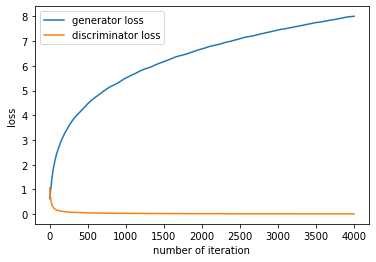

In [129]:
plt.plot(gan.g_loss[:4000])
plt.plot(gan.d_loss[:4000])
plt.legend(['generator loss', 'discriminator loss'])
plt.xlabel('number of iteration')
plt.ylabel('loss')

In [130]:
all_gen_samples = gen_samples10.reshape(-1, 10)
p_value = np.mean([stats.normaltest(all_gen_samples[i]).pvalue for i in range(1000)])
print("Mean p_value", p_value)

/Users/ekaterinapogodina/venv3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Mean p_value 3.093248235225711e-05


In [133]:
print(p_value * 10)

0.0003093248235225711


In [135]:
np.mean(all_gen_samples), np.std(all_gen_samples)

(0.9999999, 3.2512953e-06)